# 二维 PCA

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", style="white")

import numpy as np
import pandas as pd
import scipy.io as sio

# load data

In [7]:
mat = sio.loadmat('./data/ex7data1.mat')
X = mat.get('X')

# visualize raw data
print(X.shape)

(50, 2)


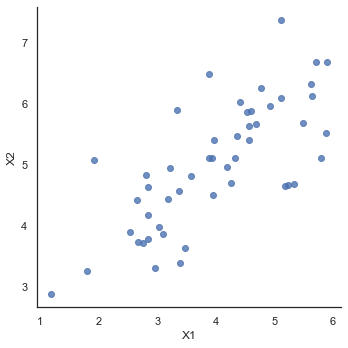

In [8]:
sns.lmplot(x='X1', y='X2', 
           data=pd.DataFrame(X, columns=['X1', 'X2']),
           fit_reg=False)
plt.show()

# PCA

# 1. normalize feature (特征缩放)

In [9]:
def normalize_feature(X):
    X_copy = X.copy()
    m, n = X_copy.shape
    
    for col in range(n):
        X_copy[:, col] = (X_copy[:, col] - X_copy[:, col].mean()) / X_copy[:, col].std()
    return X_copy

# 2.covariance matrix $\Sigma$
<img style="float: left;" src="../img/cov_mat.png">

In [10]:
def covariance_matrix(X): # calculate sigma
    m = X.shape[0]
    return (X.T @ X) / m

# 3.PCA

In [22]:
def pca(X):
    """
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html
    Args:
        X ndarray(m, n)
    Returns:
        U ndarray(n, n): principle components
    """
    X_normal = normalize_feature(X)
    
    Sigma = covariance_matrix(X_normal)
    
    U, S, V = np.linalg.svd(Sigma)  # U: principle components (n, n)
    return U, S, V

# 4. project data to lower dimension

In [28]:
def project_data(X, U, K):
    """
    Args:
        U (ndarray) (n, n)
    Return:
        projected X (n dim) at k dim
    """
    m, n = X.shape

    if K > n:
        raise ValueError('k should be lower dimension of n')

    return X @ U[:, :K] # X:(50,2) U[:,:K]:(2,k)

# 5. recover data to original dimension
Of course, there would be inevitable information loss if you boost data from lower to higher dimension

In [47]:
def recover_data(Z, U):
    m, n = Z.shape
    if n >= U.shape[0]:
        raise ValueError('Z dimension is >= U, you should recover from lower dimension to higher')
    return Z @ U[:, :n].T # Z:(50,k) U[:,:n].T:(k,2) k 为降维后的维度

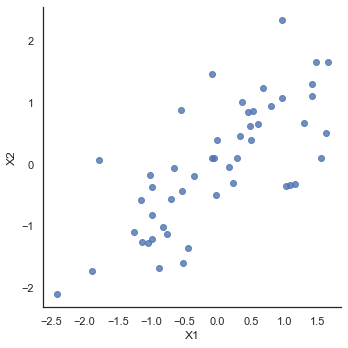

In [19]:
X_norm = normalize_feature(X)
# see X after normalize_feature, compare with above
sns.lmplot(x='X1', y='X2', 
           data=pd.DataFrame(X_norm, columns=['X1', 'X2']),
           fit_reg=False)
plt.show()

In [15]:
Sigma =covariance_matrix(X_norm)  # capital greek Sigma
Sigma  # (n, n)

array([[1.        , 0.73553038],
       [0.73553038, 1.        ]])

http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html

In [23]:
U, S, V = pca(X_norm)
U

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [24]:
u1 = U[0]
u1

array([-0.70710678, -0.70710678])

In [29]:
# show top 10 projected data
Z = project_data(X_norm, U, 1)
Z[:10]

array([[ 1.49631261],
       [-0.92218067],
       [ 1.22439232],
       [ 1.64386173],
       [ 1.2732206 ],
       [-0.97681976],
       [ 1.26881187],
       [-2.34148278],
       [-0.02999141],
       [-0.78171789]])

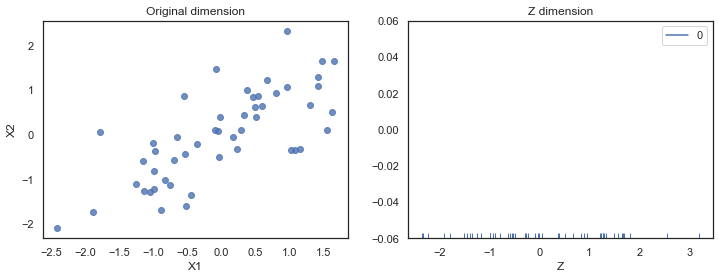

In [43]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

sns.regplot(x='X1', y='X2', 
           data=pd.DataFrame(X_norm, columns=['X1', 'X2']),
           fit_reg=False,
           ax=ax1)
ax1.set_title('Original dimension')

sns.rugplot(data=Z, ax=ax2)
ax2.set_xlabel('Z')
ax2.set_title('Z dimension')
plt.show()

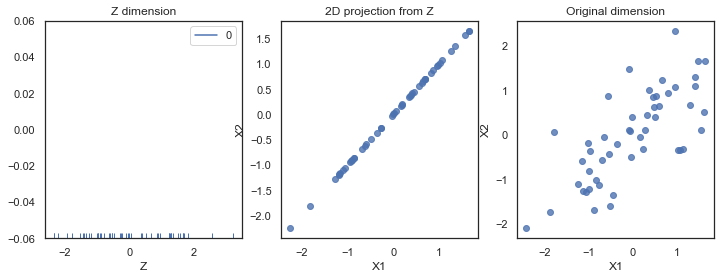

In [48]:
X_recover = recover_data(Z, U)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 4))

sns.rugplot(data=Z, ax=ax1)
ax1.set_title('Z dimension')
ax1.set_xlabel('Z')

sns.regplot(x='X1', y='X2', 
           data=pd.DataFrame(X_recover, columns=['X1', 'X2']),
           fit_reg=False,
           ax=ax2)
ax2.set_title("2D projection from Z")

sns.regplot(x='X1', y='X2', 
           data=pd.DataFrame(X_norm, columns=['X1', 'X2']),
           fit_reg=False,
           ax=ax3)
ax3.set_title('Original dimension')
plt.show()

### the projection from `(X1, X2)` to `Z` could be visualized like this
<img style="float: central;" src="../img/pca_projection.png">